In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seastar
from cycler import cycler

from os.path import abspath, dirname, join
from seastar.utils.tools import lin2db 


# Load dataset

In [2]:
testpath = join(dirname(dirname(seastar.__file__)),'test_data')
level1 = xr.load_dataset(join(testpath, '20220522T0539-0543_OSCAR_L1C_Track_1_Grd500x500m_Eff500x500m_2025.06.2.nc'))

In [3]:
level1

<xarray.Dataset> Size: 36kB
Dimensions:                (Antenna: 3, CrossRange: 10, GroundRange: 10)
Coordinates:
  * GroundRange            (GroundRange) float64 80B 1.076e+03 ... 5.54e+03
  * CrossRange             (CrossRange) float64 80B -2.608e+03 ... 1.856e+03
  * Antenna                (Antenna) <U4 48B 'Mid' 'Fore' 'Aft'
    latitude               (CrossRange, GroundRange) float64 800B 48.46 ... 4...
    longitude              (CrossRange, GroundRange) float64 800B -5.153 ... ...
Data variables: (12/19)
    Intensity              (Antenna, CrossRange, GroundRange) float64 2kB 0.1...
    Coherence              (Antenna, CrossRange, GroundRange) float64 2kB nan...
    Interferogram          (Antenna, CrossRange, GroundRange) float64 2kB nan...
    Polarization           (Antenna) <U2 24B 'VV' 'VV' 'VV'
    AntennaAzimuthImage    (Antenna, CrossRange, GroundRange) float64 2kB 91....
    TimeLag                (Antenna, CrossRange, GroundRange) float64 2kB nan...
    ...                     ...
    Intensity_dB           (Antenna, CrossRange, GroundRange) float64 2kB -10...
    CentralWavenumber      (Antenna) float64 24B 282.9 282.9 282.9
    RadialSurfaceVelocity  (Antenna, CrossRange, GroundRange) float64 2kB nan...
    Sigma0                 (Antenna, CrossRange, GroundRange) float64 2kB 0.4...
    Sigma0CalImage         (Antenna, CrossRange, GroundRange) float64 2kB -6....
    InterferogramCalImage  (Antenna, CrossRange, GroundRange) float64 2kB 0.0...
Attributes: (12/23)
    Source:                                   MetaSensing Airborne SAR
    History:                                  18-Mar-2025 15:28:50 File Gener...
    Campaign:                                 202205_IroiseSea
    Platform:                                 OSCAR
    ProcessingLevel:                          L1C
    Track:                                    Track_1
    ...                                       ...
    OceanPatternCalibrationFileName:          Cal_OSCAR_OceanPattern_NRCS_202...
    OceanPatternCalibrationFileShortName:     bb48
    NRCSGMF:                                  NSCAT-4DS
    LandCalibFileName:                        Cal_OSCAR_LandCalib_Interferogr...
    LandCalibFileShortName:                   d54b
    Calibration:                              NRCS calibrated using OceanPatt...

# Plot Level 1 data

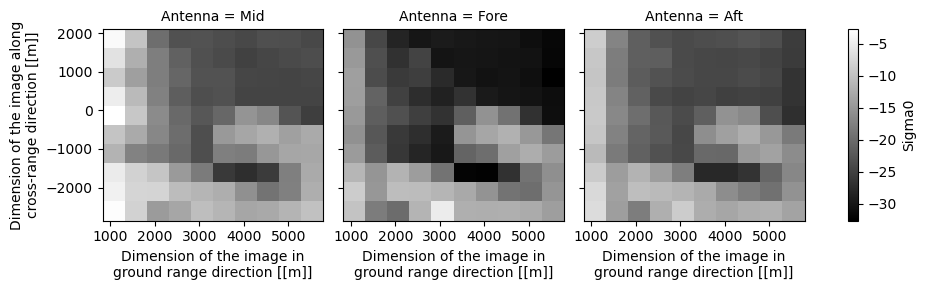

In [4]:
lin2db(level1.Sigma0).plot(col='Antenna', cmap='gist_gray')

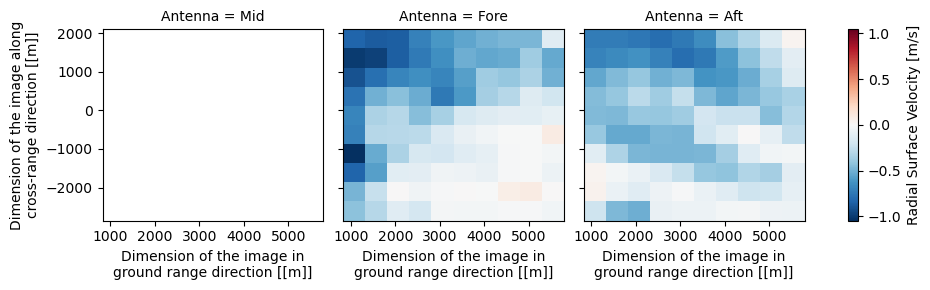

In [5]:
level1.RadialSurfaceVelocity.plot(col='Antenna')

# Process Level2

In [8]:
dict_L2_process = dict({
    'gmf': {'nrcs': {'name': 'nscat4ds'}, 'doppler': {'name': 'oscar20220522T11-18_v20250318'}},
    'L2_processor': 'WCR',
    'RSV_Noise': 0.2,
    'Kp': 0.2
})

In [9]:
dict_ambiguity = {'name':'sort_by_cost'}

## Single pixel

In [10]:
pixelL1 = level1.isel(GroundRange=0,CrossRange=0)

In [ ]:
pixelL2 = seastar.retrieval.level2.processing_OSCAR_L1_to_L2(pixelL1, dict_L2_process, dict_ambiguity)

To Be Done - uncertainty function
To Be Done find_initial_value


2025-10-07 15:10:26,926 - seastar - ERROR - The following attrs are missing in ds.attrs: ['DopplerGMF', 'RSVNoise', 'L2Processor']
2025-10-07 15:10:27,226 - seastar - ERROR - The following attrs are missing in ds.attrs: ['RSVNoise']


<xarray.Dataset> Size: 360B
Dimensions:                     (x_variables: 4, Observables: 2, Antenna: 3)
Coordinates:
  * x_variables                 (x_variables) <U3 48B 'u' 'v' 'c_u' 'c_v'
  * Observables                 (Observables) <U6 48B 'sigma0' 'RSV'
    fun_variables               (Observables, Antenna) int64 48B 0 1 2 3 4 5
  * Antenna                     (Antenna) <U4 48B 'Mid' 'Fore' 'Aft'
    GroundRange                 float64 8B 1.076e+03
    CrossRange                  float64 8B -2.608e+03
    latitude                    float64 8B 48.46
    longitude                   float64 8B -5.153
Data variables: (12/14)
    x                           (x_variables) float64 32B -2.975 ... 1.343
    cost                        float64 8B 1.025
    CurrentU                    float64 8B 0.228
    CurrentV                    float64 8B 1.343
    EarthRelativeWindU          float64 8B -2.975
    EarthRelativeWindV          float64 8B -5.477
    ...                          ...
    OceanSurfaceWindSpeed       float64 8B 7.535
    OceanSurfaceWindDirection   float64 8B 25.16
    EarthRelativeWindSpeed      float64 8B 6.233
    EarthRelativeWindDirection  float64 8B 28.51
    CurrentVelocity             float64 8B 1.363
    CurrentDirection            float64 8B 9.631
Attributes: (12/28)
    Source:                                   MetaSensing Airborne SAR
    History:                                  18-Mar-2025 15:28:50 File Gener...
    Campaign:                                 202205_IroiseSea
    Platform:                                 OSCAR
    ProcessingLevel:                          L2B
    Track:                                    Track_1
    ...                                       ...
    Calibration:                              NRCS calibrated using OceanPatt...
    Kp:                                       0.2
    RSV_Noise:                                0.2
    Sigma0GMF:                                nscat4ds
    DopplerGMF:                               oscar20220522T11-18_v20250318
    L2Processor:                              WCR

## Full 2D

In [14]:
level2 = seastar.retrieval.level2.processing_OSCAR_L1_to_L2(level1, dict_L2_process, dict_ambiguity)

To Be Done - uncertainty function


100%|██████████| 100/100 [04:33<00:00,  2.73s/it]
2025-10-07 15:22:46,370 - seastar - ERROR - The following attrs are missing in ds.attrs: ['DopplerGMF', 'RSVNoise', 'L2Processor']
2025-10-07 15:22:46,591 - seastar - ERROR - The following attrs are missing in ds.attrs: ['RSVNoise']


In [15]:
level2

<xarray.Dataset> Size: 16kB
Dimensions:                     (CrossRange: 10, GroundRange: 10,
                                 x_variables: 4, Observables: 2, Antenna: 3)
Coordinates:
  * CrossRange                  (CrossRange) float64 80B -2.608e+03 ... 1.856...
  * GroundRange                 (GroundRange) float64 80B 1.076e+03 ... 5.54e+03
  * x_variables                 (x_variables) <U3 48B 'u' 'v' 'c_u' 'c_v'
  * Observables                 (Observables) <U6 48B 'sigma0' 'RSV'
    fun_variables               (Observables, Antenna) int64 48B 0 1 2 3 4 5
  * Antenna                     (Antenna) <U4 48B 'Mid' 'Fore' 'Aft'
    latitude                    (CrossRange, GroundRange) float64 800B 48.46 ...
    longitude                   (CrossRange, GroundRange) float64 800B -5.153...
Data variables: (12/14)
    x                           (CrossRange, GroundRange, x_variables) float64 3kB ...
    cost                        (CrossRange, GroundRange) float64 800B 1.025 ...
    CurrentU                    (CrossRange, GroundRange) float64 800B 0.228 ...
    CurrentV                    (CrossRange, GroundRange) float64 800B 1.343 ...
    EarthRelativeWindU          (CrossRange, GroundRange) float64 800B -2.975...
    EarthRelativeWindV          (CrossRange, GroundRange) float64 800B -5.477...
    ...                          ...
    OceanSurfaceWindSpeed       (CrossRange, GroundRange) float64 800B 7.535 ...
    OceanSurfaceWindDirection   (CrossRange, GroundRange) float64 800B 25.16 ...
    EarthRelativeWindSpeed      (CrossRange, GroundRange) float64 800B 6.233 ...
    EarthRelativeWindDirection  (CrossRange, GroundRange) float64 800B 28.51 ...
    CurrentVelocity             (CrossRange, GroundRange) float64 800B 1.363 ...
    CurrentDirection            (CrossRange, GroundRange) float64 800B 9.631 ...
Attributes: (12/28)
    Source:                                   MetaSensing Airborne SAR
    History:                                  18-Mar-2025 15:28:50 File Gener...
    Campaign:                                 202205_IroiseSea
    Platform:                                 OSCAR
    ProcessingLevel:                          L2B
    Track:                                    Track_1
    ...                                       ...
    Calibration:                              NRCS calibrated using OceanPatt...
    Kp:                                       0.2
    RSV_Noise:                                0.2
    Sigma0GMF:                                nscat4ds
    DopplerGMF:                               oscar20220522T11-18_v20250318
    L2Processor:                              WCR

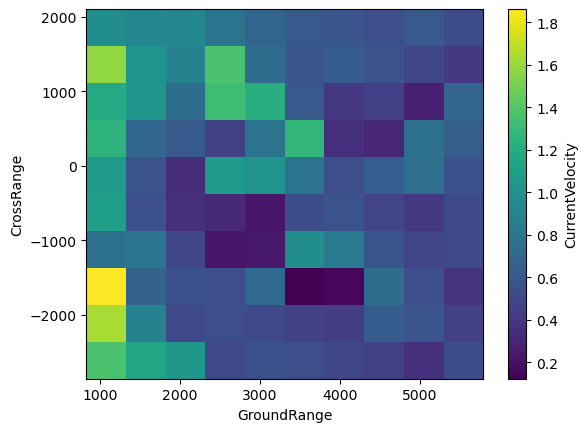

In [16]:
level2.CurrentVelocity.plot()

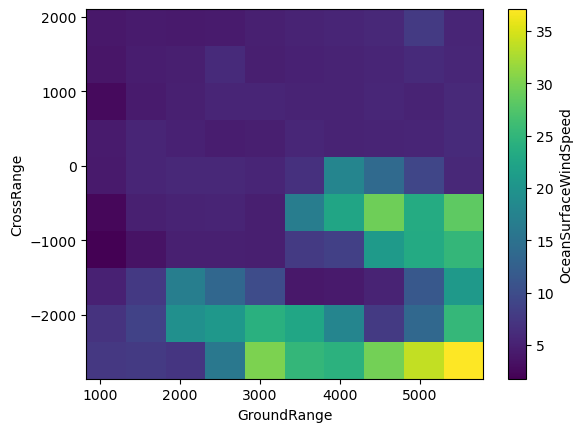

In [17]:
level2.OceanSurfaceWindSpeed.plot()